# **Проект: Хакатон "Иннополис" (работа DA)**

## **0. Вводная часть: описание проекта**

**Общее описание задачи:**

1. Анализ нынешнего состояния телеграм-канала города;

2. Выявление эффективных и неэффективных видов работы телеграм-канала;

3. Поиск новых способов привлечения аудитории.

**Цель:**

увеличение лояльной аудитории бренда путем увеличения количества подписчиков телеграм-канала @innopolistg.
1. Повышение лояльности необходимо для того, чтобы читатели канала в будущем стали жителями Иннополиса.
2. С 1 квартала 2024 года планируется монетизация ТГ-канала.

**Обязательные требования для работы DA**

- Необходимо выявить, наиболее эффективные и точные метрики для еженедельного/ежемесячного анализа работы.
- Сформировать список KPI для дальнейшей работы и отслеживания заказчиком совместно с маркетологами.

**Артефакты для направления работы DA:**

1. Вывести метрики эффективности поста:

- Тип публикации
- Тема
- Объем текста
- Отсутствие / наличие эмодзи
- Отсутствие / наличие изображений
- Знаки препинания (сложность текста)

2. Построить облако слов и с его помощью определить самые популярные темы у авторов канала.

3. Определить самые популярные темы (больше реакций)

4. Определить минимально популярные темы (меньше реакций)

5. Определить лучшее время для публикаций (время максимального отклика ЦА)

6. Семантический анализ комментариев к постам:

- какие посты побуждают людей переехать/приехать в Иннополис?
- Выстраивание взаимосвязи между комментариями по типу «хочу к вам» и «как переехать» с действительным переездом в город.

7. Анализ эмодзи

- **Этапы работы**
    1. `13 декабря, среда`  Стартовая встреча
        - Рассказ о задаче
        - Знакомство с участниками
        - Разбор вопросов
    2. `14 декабря, четверг` Изучить данные
    3. `15 декабря, пятница` Встреча с маркетологами, определить список базовых гипотез
    4. `16 декабря, суббота` Предобработка данных(распределяется между участниками)
    5. `16 декабря, суббота — 22 декабря, пятница`
    Исследовательский анализ данных, добавление новых признаков (на основе старых) и формирование гипотез
        - Частотный анализ слов постов
        - Частотный анализ комментариев
        - Анализ времени публикаций
        - Семантический анализ комментариев к постам
        - Анализ реакций на сообщения
        - Формирование Метрик оценки популярности поста
        - Анализ эмодзи к постам
    6. `19 декабря, вторник` Консультация с экспертом
    7. `23 декабря, суббота` Встреча с маркетологами и обсуждение
    8. `23 декабря, суббота` Дооформить выводы в итоговой презентации
    9. `23 декабря, суббота` Команды отправляют решения на проверку (от Анализа данных и от Маркетологов)
    10. `23 декабря, суббота — 26 декабря, вторник` Проверка работ консультантами
    11. `26 декабря, вторник` — презентация результатов Иннополису, DEMO

**Итоги работы:**

Специалисты DA - проведены все исследования, результат работы   выводы оформлены в соответствии с требованиями чек-листа сдачи артефактов работы.

**Чек-лист:**

1. Работа на проверку передаётся сразу в нескольких вариантах:
    1. Проект в виде ссылки на Google colab
        - У работы должен быть открыт доступ с возможностью комментирования
    2. Проект в виде PDF-файла, экспортированного из Google colab (для просмотра)
    3. Набора графиков в SVG-формате
2. Работа должна иметь
    1. Последовательную структуру
    2. Вводную часть / описание проекта
    3. Чистый и понятный код с комментариями
    4. Подходящие визуализации / графики

## **1. Импорт библиотек**

In [1]:
# Загрузим библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import plotly.express as px
from plotly import graph_objects as go
#import warnings
#warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.set_option('display.float_format', '{:.2f}'.format)

## **2. Загрузка файлов и создание датафреймов**

### **2.0. Описание данных от заказчика**

**Описание данных от заказчика:**

1. ***Комментарии к таблицам с данными (innopolistg.csv)***

- *channel* - телеграм канал
- *id* - айдишник поста в этом канале
- *date* - дата публикации
- *text* - текстовое содержание поста
- *views* - количество просмотров
- *count_reactions* - количество эмоджи.

! Важно провалидировать тональность эмоджи по факту хотя бы на небольшой выборке.

 - *with_media* - показывает было ли прикреплено к посту фото/видео, принимает значение Nan, если в посте только текст(количество медиа не подсчитано)
 - *replies* - комментарии, подсчитываются только комменты, оставленные под постом подписчиками без ответов на эти комменты.

2. **comments_innopolistg_061223.csv**
- дополнительный датасет - комментарии к постам;
- связь с основной таблице по полю  “id”  -“post_id”.

3. **innopolistg_emoji***
- дополнительная таблица - статистика по каждому эмодзи, примененному в публикациях.

### **2.1. Предобработка данных: файл comments_innopolistg_061223.csv**

In [2]:
# Создадим датафрейм comments на основе файла comments_innopolistg_061223.csv и изучим его
comments = pd.read_csv('https://github.com/VeraNovich/Yandex.Praktikum_WorkShop/raw/main/temp/comments_innopolistg_061223.csv')
comments.head(2)

Unnamed: 0  post_id               date_comment text_comment
0           0     1421  2023-12-06 12:42:17+00:00            💔
1           1     1421  2023-12-06 12:42:40+00:00          NaN

In [3]:
# Изучим общую информацию по датафрейму
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2511 non-null   int64 
 1   post_id       2511 non-null   int64 
 2   date_comment  2511 non-null   object
 3   text_comment  2013 non-null   object
dtypes: int64(2), object(2)
memory usage: 78.6+ KB


In [4]:
# Изменнин тип данных в столбце с датой
comments['date_comment'] = pd.to_datetime(comments['date_comment'].str[:-6])
comments['date_comment'].head(2)

0   2023-12-06 12:42:17
1   2023-12-06 12:42:40
Name: date_comment, dtype: datetime64[ns]

In [5]:
# Определим дату начала и дату окончания периода, представленного в датафрейме
print('Дата начала периода: ', comments['date_comment'].min())
print('Дата окончания периода: ', comments['date_comment'].max())

Дата начала периода:  2022-04-05 15:05:17
Дата окончания периода:  2023-12-06 14:52:48


In [6]:
# Удалим ненужный для анализа столбец Unnamed
comments = comments[['post_id', 'date_comment', 'text_comment']]

In [7]:
# Проверим датафрейм на наличие полных дубликатов
len(comments[comments.duplicated()])

173

In [8]:
# Выведем на экран количество пропусков в датафрейме
comments.isna().sum()

post_id           0
date_comment      0
text_comment    498
dtype: int64

In [9]:
# Уточним количество уникальных id постов
comments['post_id'].nunique()

338

In [10]:
# Изучим общую информацию по датафрейму
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   post_id       2511 non-null   int64         
 1   date_comment  2511 non-null   datetime64[ns]
 2   text_comment  2013 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 59.0+ KB


----------------
----------------

**Промежуточны вывод:**

- на базе файла comments_innopolistg_061223.csv создан датасет comments;
- удален столбец Unnamed;
- в столбце дата изменен тип данных на datetime;
- выявлено 173 полных дубликата, не удалены, так как считаю, что в данном датафрейме могут быть дубликаты, исходя из сути данных;
- пропуски есть в столбце text_comment - 498 строк из 2511. Не удалены, их боле 5%, требуется уточнение их природы у заказчика;
- данные предоставлены за период с 2022-04-05 по 2023-12-06;
- в данных комментарии к 338 постам;
- в итоговом датафрейме 3 столбца, 2511 строк.

-------------------
---------------------

### **2.2. Предобработка данных: файл innopolistg.csv**

In [11]:
# Создадим датафрейм innopolistg на основе файла innopolistg.csv и изучим его
innopolistg = pd.read_csv('https://github.com/VeraNovich/Yandex.Praktikum_WorkShop/raw/main/temp/innopolistg.csv')
innopolistg.head(2)

Unnamed: 0                   channel    id                       date  \
0           0  https://t.me/innopolistg  1414  2023-12-04 09:31:49+00:00   
1           7  https://t.me/innopolistg  1407  2023-12-01 14:40:01+00:00   

                                                text   views  reactions_count  \
0  1. Университет Иннополис [открыл штаб-квартиру...  1445.0               31   
1  Провели дискуссию о будущем туризма в Иннополи...  2234.0               51   

   comments    type_attachment  
0         0  MessageMediaPhoto  
1         2  MessageMediaPhoto

In [12]:
# Изучим общую информацию по датафрейму
innopolistg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       536 non-null    int64  
 1   channel          536 non-null    object 
 2   id               536 non-null    int64  
 3   date             536 non-null    object 
 4   text             536 non-null    object 
 5   views            536 non-null    float64
 6   reactions_count  536 non-null    int64  
 7   comments         536 non-null    int64  
 8   type_attachment  488 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 37.8+ KB


In [13]:
# Изменнин тип данных в столбце с датой
innopolistg['date'] = pd.to_datetime(innopolistg['date'].str[:-6])
innopolistg['date'].head(2)

0   2023-12-04 09:31:49
1   2023-12-01 14:40:01
Name: date, dtype: datetime64[ns]

In [14]:
# Определим дату начала и дату окончания периода, представленного в датафрейме
print('Дата начала периода: ', innopolistg['date'].min())
print('Дата окончания периода: ', innopolistg['date'].max())

Дата начала периода:  2022-03-01 13:11:03
Дата окончания периода:  2023-12-04 09:31:49


In [15]:
# Посчитаем количество уникальных значений в столбце channel
innopolistg['channel'].nunique()

1

In [16]:
# Удалим ненужные для анализа столбцы Unnamed и channel
innopolistg = innopolistg[['id', 'date', 'text', 'views', 'reactions_count', 'comments', 'type_attachment']]

In [17]:
# Проверим датафрейм на наличие полных дубликатов
len(innopolistg[innopolistg.duplicated()])

0

In [18]:
# Выведем на экран количество пропусков в датафрейме
innopolistg.isna().sum()

id                  0
date                0
text                0
views               0
reactions_count     0
comments            0
type_attachment    48
dtype: int64

In [19]:
innopolistg.loc[innopolistg['type_attachment'].isna(), 'type_attachment'] = 'MessageMediaVideo'

In [20]:
# Уточним количество уникальных id постов
innopolistg['id'].nunique()

536

In [21]:
# Изучим общую информацию по датафрейму
innopolistg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               536 non-null    int64         
 1   date             536 non-null    datetime64[ns]
 2   text             536 non-null    object        
 3   views            536 non-null    float64       
 4   reactions_count  536 non-null    int64         
 5   comments         536 non-null    int64         
 6   type_attachment  536 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 29.4+ KB


----------------
----------------

**Промежуточны вывод:**

- на базе файла innopolistg.csv создан датасет innopolistg;
- удалены столбцы Unnamed и channel;
- в столбце дата изменен тип данных на datetime;
- полных дубликата не выявлено;
- пропуски есть в столбце type_attachment - 48 строк из 536. Пропуски заполнены 'MessageMediaVideo' на основании изучения постов в телеграм канале;
- данные предоставлены за период с 2022-03-01 по 2023-12-04;
- данные предоставлены по 536 постам;
- в итоговом датафрейме 7 столбцов, 536 строк.

-------------------
---------------------

### **2.3. Предобработка данных: файл innopolistg_emoji.csv**

In [22]:
# Создадим датафрейм innopolistg_emoji на основе файла innopolistg_emoji.csv и изучим его
innopolistg_emoji = pd.read_csv('https://github.com/VeraNovich/Yandex.Praktikum_WorkShop/raw/main/temp/innopolistg_emoji.csv')
innopolistg_emoji.head(2)

Unnamed: 0  index                   channel    id  \
0           0      5  https://t.me/innopolistg  1421   
1           1      6  https://t.me/innopolistg  1420   

                        date  \
0  2023-12-06 12:41:17+00:00   
1  2023-12-05 06:01:58+00:00   

                                                text   views  reactions_count  \
0  2023 год подходит к концу. И мы вспоминаем сам...  2294.0               45   
1  В поисках новых подарков Дед Мороз заглянул в ...  2116.0               36   

   comments    type_attachment  \
0         4  MessageMediaPhoto   
1         6  MessageMediaPhoto   

                                           reactions  
0  {'_': 'MessageReactions', 'results': [{'_': 'R...  
1  {'_': 'MessageReactions', 'results': [{'_': 'R...

In [23]:
# Ознакомимся с данными столбца 'reactions'
#pd.set_option('display.max_colwidth', None)
#innopolistg_emoji['reactions'][:2]

In [24]:
# Ознакомимся с данными столбца 'text'
#innopolistg_emoji['text'][:5]

In [25]:
# Изучим общую информацию по датафрейму
innopolistg_emoji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       539 non-null    int64  
 1   index            539 non-null    int64  
 2   channel          539 non-null    object 
 3   id               539 non-null    int64  
 4   date             539 non-null    object 
 5   text             539 non-null    object 
 6   views            539 non-null    float64
 7   reactions_count  539 non-null    int64  
 8   comments         539 non-null    int64  
 9   type_attachment  491 non-null    object 
 10  reactions        534 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 46.4+ KB


In [26]:
# Изменнин тип данных в столбце с датой
innopolistg_emoji['date'] = pd.to_datetime(innopolistg_emoji['date'].str[:-6])
innopolistg_emoji['date'].head(2)

0   2023-12-06 12:41:17
1   2023-12-05 06:01:58
Name: date, dtype: datetime64[ns]

In [27]:
# Определим дату начала и дату окончания периода, представленного в датафрейме
print('Дата начала периода: ', innopolistg_emoji['date'].min())
print('Дата окончания периода: ', innopolistg_emoji['date'].max())

Дата начала периода:  2022-03-01 13:11:03
Дата окончания периода:  2023-12-06 12:41:17


In [28]:
# Изучим уникальные значения столбца index
#innopolistg_emoji['index'].unique()

In [29]:
# Посчитаем количество уникальных значений в столбце channel
innopolistg_emoji['channel'].nunique()

1

In [30]:
# Удалим ненужные для анализа столбцы Unnamed, index и channel
innopolistg_emoji = innopolistg_emoji[['id', 'date', 'text', 'views',
       'reactions_count', 'comments', 'type_attachment', 'reactions']]

In [31]:
# Проверим датафрейм на наличие полных дубликатов
len(innopolistg_emoji[innopolistg_emoji.duplicated()])

0

In [32]:
# Выведем на экран количество пропусков в датафрейме
innopolistg_emoji.isna().sum()

id                  0
date                0
text                0
views               0
reactions_count     0
comments            0
type_attachment    48
reactions           5
dtype: int64

In [33]:
# Изучим причину пропусков в столбце 'type_attachment'
innopolistg_emoji[innopolistg_emoji['type_attachment'].isna()].head()

id                date  \
71   1216 2023-09-22 09:17:10   
72   1215 2023-09-22 08:59:37   
102  1118 2023-08-18 14:13:43   
103  1115 2023-08-18 08:31:16   
104  1114 2023-08-17 15:14:15   

                                                  text   views  \
71   6 коротких ответов, которые помогут сделать Ин...  5497.0   
72   **Этим летом Иннополис превратился** **в кэмп ...  5539.0   
102  На Стадионе Иннополиса проходят четвертьфиналы...  5043.0   
103  Сегодня в 16:00 на Стадионе Иннополиса стартуе...  4926.0   
104  Андрей Себрант про перспективы и хайп искусств...  4696.0   

     reactions_count  comments type_attachment  \
71                20         0             NaN   
72                60         2             NaN   
102               42         5             NaN   
103               10         0             NaN   
104               33         0             NaN   

                                             reactions  
71   {'_': 'MessageReactions', 'results': [{'_': 'R...  
72   {'_': 'MessageReactions', 'results': [{'_': 'R...  
102  {'_': 'MessageReactions', 'results': [{'_': 'R...  
103  {'_': 'MessageReactions', 'results': [{'_': 'R...  
104  {'_': 'MessageReactions', 'results': [{'_': 'R...

In [34]:
# Изучим причину пропусков в столбце 'type_attachment'
innopolistg_emoji[innopolistg_emoji['reactions'].isna()].head()

id                date  \
105  1112 2023-08-17 07:50:11   
256   718 2023-02-02 17:04:08   
471   164 2022-06-04 14:24:42   
474   161 2022-06-02 14:46:30   
485   134 2022-05-25 12:34:21   

                                                  text   views  \
105  **На открытии международной конференции AI IN ...  4676.0   
256     Про онбординг новых и внешних сотрудников в QA  3447.0   
471                                                  🤔  2429.0   
474                   Так вот вы какие, меры поддержки  2448.0   
485                   Ещё немного о цифровом искусстве  2008.0   

     reactions_count  comments       type_attachment reactions  
105                0         0  MessageMediaDocument       NaN  
256                0         0                   NaN       NaN  
471                0         0                   NaN       NaN  
474                0         0                   NaN       NaN  
485                0         0                   NaN       NaN

__________________
__________________
**Промежуточный вывод:**

Пришлось обратиться к телеграм каналу...

Пропуски в столбце 'type_attachment' это либо посты с видео, либо посты с опросами. Странно, что они автоматически не индифицируются.

Пропуски в столбце 'reactions' - это  отсутствие реакций.

Заменю пропуски в столбце 'type_attachment' на MessageMediaVideo.

Пропуски в столбце 'reactions' пока трогать не буду, возможно далее при создании сводных таблиц заменю на 0.

______________________
_____________________________


In [35]:
innopolistg_emoji.loc[innopolistg_emoji['type_attachment'].isna(), 'type_attachment'] = 'MessageMediaVideo'

In [36]:
# Изучим общую информацию по датафрейму
innopolistg_emoji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               539 non-null    int64         
 1   date             539 non-null    datetime64[ns]
 2   text             539 non-null    object        
 3   views            539 non-null    float64       
 4   reactions_count  539 non-null    int64         
 5   comments         539 non-null    int64         
 6   type_attachment  539 non-null    object        
 7   reactions        534 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 33.8+ KB


----------------
----------------

**Промежуточны вывод:**

- на базе файла innopolistg_emoji.csv создан датасет innopolistg_emoji;
- удалены столбцы Unnamed, index и channel;
- в столбце date изменен тип данных на datetime;
- полных дубликата не выявлено;
- пропуски есть в столбце type_attachment - 48 строк из 539 (заменены) и в столбце reactions - 5 из 539 (оставлены);
- данные предоставлены за период с 2022-03-01 по 2023-12-06;
- данные предоставлены по 539 постам;
- в итоговом датафрейме 8 столбцов, 539 строк.

-------------------
---------------------

### **2.4. Предобработка данных: файл telegram.xlsx**

In [37]:
# Создадим датафрейм telegram_info на основе файла Показатели 20Telegram 20Инно.csv и изучим его
telegram_info = pd.read_excel('https://github.com/VeraNovich/Yandex.Praktikum_WorkShop/raw/main/temp/telegram.xlsx')
telegram_info = telegram_info.dropna()
telegram_info

Внутренняя статистика телеграмма  2023-08-28 00:00:00  \
0                                    подписчики                 7127   
1  просмотры\n(сумма просмотров за каждый день)               100756   
2     активность\n(реакции, репосты + комменты)                  720   
3                вовлеченность\n(по активности)             0.007146   
5                                        TgStat  2023-08-28 00:00:00   
6                      средний охват публикации                 3784   
7                           ERR (по просмотрам)                0.531   

   2023-09-04 00:00:00  2023-09-11 00:00:00  2023-09-18 00:00:00  \
0                 7201                 7327                    —   
1               125629               100718                76228   
2                 1268                  820                  527   
3             0.010093             0.008142             0.006913   
5  2023-09-04 00:00:00  2023-09-11 00:00:00  2023-09-18 00:00:00   
6                 3581                 3809                 3902   
7                0.498                 0.52                0.527   

   2023-09-25 00:00:00  2023-10-02 00:00:00  2023-10-09 00:00:00  \
0                 7493                 7543                 7577   
1                65581                55980               123109   
2                  548                  388                 1345   
3             0.008356             0.006931             0.010925   
5  2023-09-25 00:00:00  2023-10-02 00:00:00  2023-10-09 00:00:00   
6                 3843                 4193                 3667   
7                0.513                0.556                0.484   

   2023-10-16 00:00:00  2023-10-23 00:00:00  2023-10-30 00:00:00  \
0                 7652                 7675                 7774   
1                87478               119222               107743   
2                  561                 1138                  456   
3             0.006413             0.009545             0.004232   
5  2023-10-16 00:00:00  2023-10-23 00:00:00  2023-10-30 00:00:00   
6                 3955                 3987                 4084   
7                0.517                0.519                0.525   

   2023-11-06 00:00:00  2023-11-13 00:00:00  2023-11-20 00:00:00  \
0                 7805                 7854                 7902   
1                94183                76034               115203   
2                  759                  440                  829   
3             0.008059             0.005787             0.007196   
5  2023-11-06 00:00:00  2023-11-13 00:00:00  2023-11-20 00:00:00   
6                 3941                 4243                 4223   
7                0.505                 0.54                0.534   

   2023-11-27 00:00:00  2023-12-04 00:00:00  
0                 8035                 8058  
1               104787               120118  
2                 1305                 1079  
3             0.012454             0.008983  
5  2023-11-27 00:00:00  2023-12-04 00:00:00  
6                 4292                 4233  
7                0.534                0.525

In [38]:
# Изучим общую информацию по датафрейму
telegram_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 7
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Внутренняя статистика телеграмма  7 non-null      object
 1   2023-08-28 00:00:00               7 non-null      object
 2   2023-09-04 00:00:00               7 non-null      object
 3   2023-09-11 00:00:00               7 non-null      object
 4   2023-09-18 00:00:00               7 non-null      object
 5   2023-09-25 00:00:00               7 non-null      object
 6   2023-10-02 00:00:00               7 non-null      object
 7   2023-10-09 00:00:00               7 non-null      object
 8   2023-10-16 00:00:00               7 non-null      object
 9   2023-10-23 00:00:00               7 non-null      object
 10  2023-10-30 00:00:00               7 non-null      object
 11  2023-11-06 00:00:00               7 non-null      object
 12  2023-11-13 00:00:00       

In [39]:
# Столбец 'Внутренняя статистика телеграмма' сделаем индексом
telegram_info = telegram_info.set_index('Внутренняя статистика телеграмма')
telegram_info.head(2)

2023-08-28 00:00:00  \
Внутренняя статистика телеграмма                                   
подписчики                                                  7127   
просмотры\n(сумма просмотров за каждый день)              100756   

                                             2023-09-04 00:00:00  \
Внутренняя статистика телеграмма                                   
подписчики                                                  7201   
просмотры\n(сумма просмотров за каждый день)              125629   

                                             2023-09-11 00:00:00  \
Внутренняя статистика телеграмма                                   
подписчики                                                  7327   
просмотры\n(сумма просмотров за каждый день)              100718   

                                             2023-09-18 00:00:00  \
Внутренняя статистика телеграмма                                   
подписчики                                                     —   
просмотры\n(сумма просмотров за каждый день)               76228   

                                             2023-09-25 00:00:00  \
Внутренняя статистика телеграмма                                   
подписчики                                                  7493   
просмотры\n(сумма просмотров за каждый день)               65581   

                                             2023-10-02 00:00:00  \
Внутренняя статистика телеграмма                                   
подписчики                                                  7543   
просмотры\n(сумма просмотров за каждый день)               55980   

                                             2023-10-09 00:00:00  \
Внутренняя статистика телеграмма                                   
подписчики                                                  7577   
просмотры\n(сумма просмотров за каждый день)              123109   

                                             2023-10-16 00:00:00  \
Внутренняя статистика телеграмма                                   
подписчики                                                  7652   
просмотры\n(сумма просмотров за каждый день)               87478   

                                             2023-10-23 00:00:00  \
Внутренняя статистика телеграмма                                   
подписчики                                                  7675   
просмотры\n(сумма просмотров за каждый день)              119222   

                                             2023-10-30 00:00:00  \
Внутренняя статистика телеграмма                                   
подписчики                                                  7774   
просмотры\n(сумма просмотров за каждый день)              107743   

                                             2023-11-06 00:00:00  \
Внутренняя статистика телеграмма                                   
подписчики                                                  7805   
просмотры\n(сумма просмотров за каждый день)               94183   

                                             2023-11-13 00:00:00  \
Внутренняя статистика телеграмма                                   
подписчики                                                  7854   
просмотры\n(сумма просмотров за каждый день)               76034   

                                             2023-11-20 00:00:00  \
Внутренняя статистика телеграмма                                   
подписчики                                                  7902   
просмотры\n(сумма просмотров за каждый день)              115203   

                                             2023-11-27 00:00:00  \
Внутренняя статистика телеграмма                                   
подписчики                                                  8035   
просмотры\n(сумма просмотров за каждый день)              104787   

                                             2023-12-04 00:00:00  
Внутренняя статистика телеграмма                                  
подписчики                                                  8058  
просмотры\n(сумма прос

In [40]:
# Транспонируем датафрейм
telegram_info = telegram_info.T
telegram_info.head(2)

Внутренняя статистика телеграмма подписчики  \
2023-08-28 00:00:00                    7127   
2023-09-04 00:00:00                    7201   

Внутренняя статистика телеграмма просмотры\n(сумма просмотров за каждый день)  \
2023-08-28 00:00:00                                                    100756   
2023-09-04 00:00:00                                                    125629   

Внутренняя статистика телеграмма активность\n(реакции, репосты + комменты)  \
2023-08-28 00:00:00                                                    720   
2023-09-04 00:00:00                                                   1268   

Внутренняя статистика телеграмма вовлеченность\n(по активности)     TgStat  \
2023-08-28 00:00:00                                    0.007146 2023-08-28   
2023-09-04 00:00:00                                    0.010093 2023-09-04   

Внутренняя статистика телеграмма средний охват публикации ERR (по просмотрам)  
2023-08-28 00:00:00                                  3784               0.531  
2023-09-04 00:00:00                                  3581               0.498

In [41]:
# Переведем индекс в столбец с датой
telegram_info = telegram_info.reset_index()
telegram_info.head(2)

Внутренняя статистика телеграмма      index подписчики  \
0                                2023-08-28       7127   
1                                2023-09-04       7201   

Внутренняя статистика телеграмма просмотры\n(сумма просмотров за каждый день)  \
0                                                                      100756   
1                                                                      125629   

Внутренняя статистика телеграмма активность\n(реакции, репосты + комменты)  \
0                                                                      720   
1                                                                     1268   

Внутренняя статистика телеграмма вовлеченность\n(по активности)     TgStat  \
0                                                      0.007146 2023-08-28   
1                                                      0.010093 2023-09-04   

Внутренняя статистика телеграмма средний охват публикации ERR (по просмотрам)  
0                                                    3784               0.531  
1                                                    3581               0.498

In [42]:
# Изменим название столбцов
telegram_info.columns = ['дата', 'подписчики', 'просмотров за день',
       'активность',
       'вовлеченность', 'TgStat', 'средний охват публикации',
       'ERR (по просмотрам)']

In [43]:
# Удалим ненужный столбец 'TgStat'
telegram_info = telegram_info[['дата', 'подписчики', 'просмотров за день', 'активность','вовлеченность', 'средний охват публикации',
       'ERR (по просмотрам)']]

In [44]:
# Восстановим пропущенное значение
telegram_info.iloc[3, 1] = round(3902/0.527)

In [45]:
telegram_info.подписчики = telegram_info.подписчики.astype(int)
telegram_info['просмотров за день'] = telegram_info['просмотров за день'].astype(int)
telegram_info['активность'] = telegram_info['активность'].astype(int)
telegram_info['вовлеченность'] = telegram_info['вовлеченность'].astype(float)
telegram_info['средний охват публикации'] = telegram_info['средний охват публикации'].astype(int)
telegram_info['ERR (по просмотрам)'] = telegram_info['ERR (по просмотрам)'].astype(float)

<ipython-input-45-fbe73bbe0258>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telegram_info.подписчики = telegram_info.подписчики.astype(int)
<ipython-input-45-fbe73bbe0258>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telegram_info['просмотров за день'] = telegram_info['просмотров за день'].astype(int)
<ipython-input-45-fbe73bbe0258>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [46]:
# Помсотрим на итоговый датафрейм
telegram_info.head(2)

дата  подписчики  просмотров за день  активность  вовлеченность  \
0 2023-08-28        7127              100756         720       0.007146   
1 2023-09-04        7201              125629        1268       0.010093   

   средний охват публикации  ERR (по просмотрам)  
0                      3784                0.531  
1                      3581                0.498

In [47]:
# Изучим общую информацию по датафрейму
telegram_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   дата                      15 non-null     datetime64[ns]
 1   подписчики                15 non-null     int64         
 2   просмотров за день        15 non-null     int64         
 3   активность                15 non-null     int64         
 4   вовлеченность             15 non-null     float64       
 5   средний охват публикации  15 non-null     int64         
 6   ERR (по просмотрам)       15 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 968.0 bytes


In [48]:
# Создадим временный датафрейм для построения визуализаций
telegram_info_plot = telegram_info.set_index('дата')
telegram_info_plot.head(2)

подписчики  просмотров за день  активность  вовлеченность  \
дата                                                                    
2023-08-28        7127              100756         720       0.007146   
2023-09-04        7201              125629        1268       0.010093   

            средний охват публикации  ERR (по просмотрам)  
дата                                                       
2023-08-28                      3784                0.531  
2023-09-04                      3581                0.498

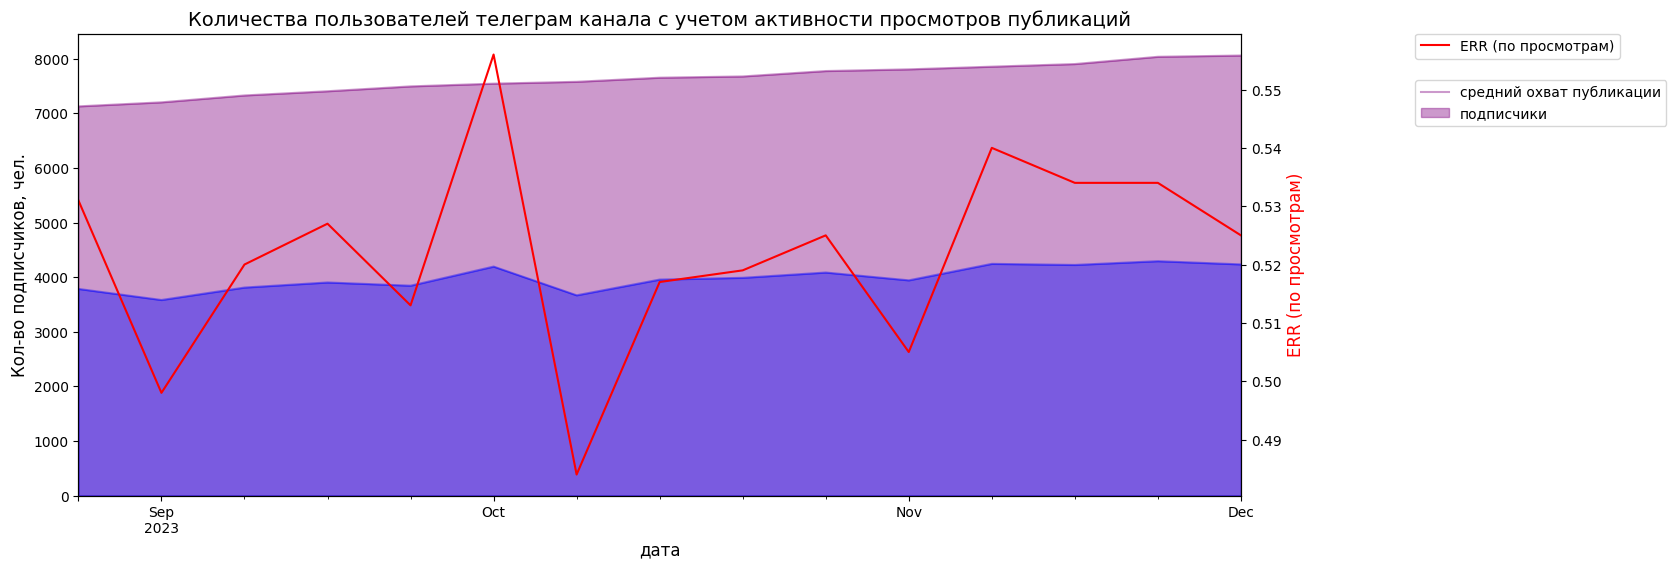

In [49]:
# Построем график количество пользователей тг канала за период сентябрь-декабрь 2023 г
fig,ax = plt.subplots(figsize=(15, 6))
ax.set_ylabel('Кол-во подписчиков, чел.', color='black', fontsize= 12)
ax.set_xlabel('Период, дн.', color='black', fontsize= 12)
ax.set_title('Количества пользователей телеграм канала с учетом активности просмотров публикаций', color='black', fontsize= 14)
telegram_info_plot['подписчики'].plot.area(alpha=0.4, color='purple',ax=ax)
telegram_info_plot['средний охват публикации'].plot.area(alpha=0.4, color='blue', ax=ax)
plt.legend(['средний охват публикации', 'подписчики'], bbox_to_anchor=( 1.15 , 0.9), loc='upper left', borderaxespad= 0)

ax2 = ax.twinx ()
#add second line to plot
telegram_info_plot['ERR (по просмотрам)'].plot(ax=ax2, color='red')
ax2.set_ylabel('ERR (по просмотрам)', color='red', fontsize= 12)
plt.legend(['ERR (по просмотрам)'], bbox_to_anchor=( 1.15 , 1 ), loc='upper left', borderaxespad= 0)
plt.show;

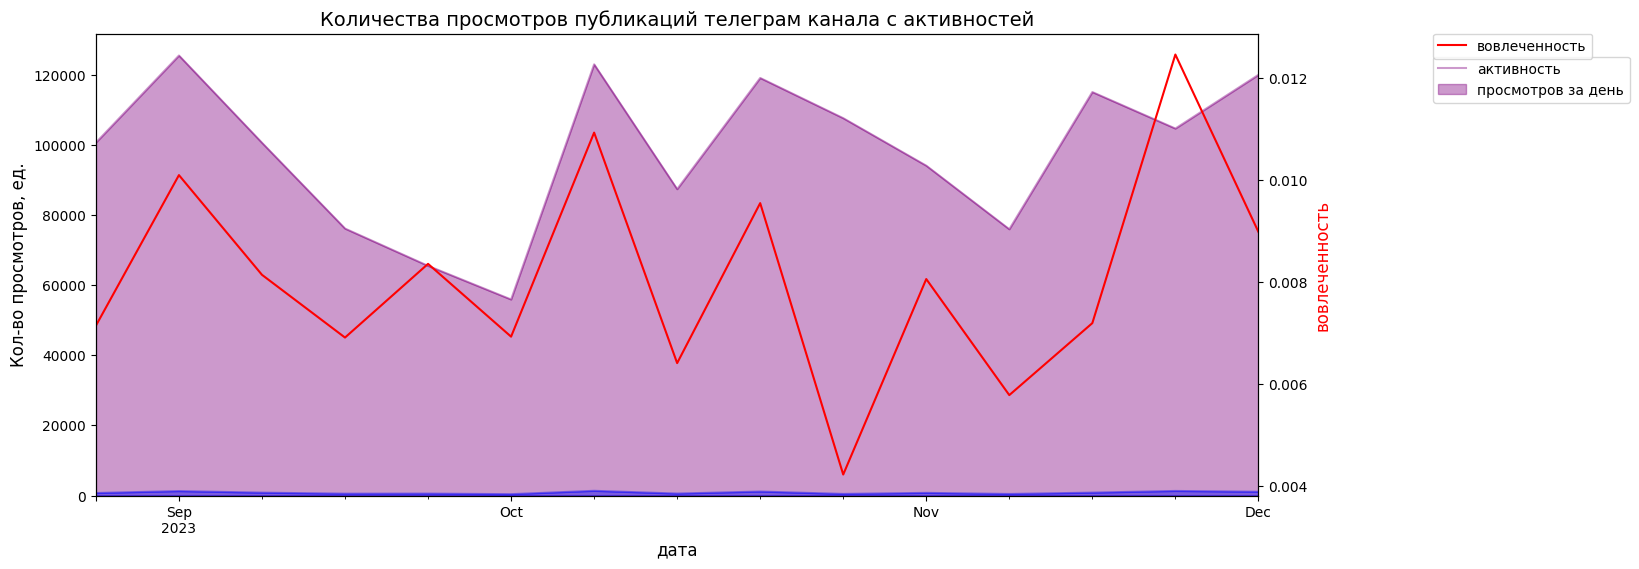

In [50]:
# Построем график количество пользователей тг канала за период сентябрь-декабрь 2023 г
fig,ax = plt.subplots(figsize=(15, 6))
ax.set_ylabel('Кол-во просмотров, ед.', color='black', fontsize= 12)
ax.set_xlabel('Период, дн.', color='black', fontsize= 12)
ax.set_title('Количества просмотров публикаций телеграм канала с активностей', color='black', fontsize= 14)
telegram_info_plot['просмотров за день'].plot.area(alpha=0.4, color='purple',ax=ax)
telegram_info_plot['активность'].plot.area(alpha=0.4, color='blue', ax=ax)
plt.legend(['активность', 'просмотров за день'], bbox_to_anchor=( 1.15 , 0.95), loc='upper left', borderaxespad= 0)

ax2 = ax.twinx ()
#add second line to plot
telegram_info_plot['вовлеченность'].plot(ax=ax2, color='red')
ax2.set_ylabel('вовлеченность', color='red', fontsize= 12)
plt.legend(['вовлеченность'], bbox_to_anchor=( 1.15 , 1 ), loc='upper left', borderaxespad= 0)
plt.show;

----------------
----------------

**Промежуточны вывод:**

- на базе файла Показатели 20Telegram 20Инно.csv создан датасет telegram_info;
- удалена строка с пропусками в исходном датасете;
- исходный датафрейм транспонирован;
- удален дублирующий столбец 'TgStat';
- полных дубликата не выявлено;
- данные предоставлены за период с 2023-08-28 по 2023-12-04;
- в итоговом датафрейме 7 столбцов, 15 строк.

Данные могут быть выгружены и использованы для построения дашборда в Datalens.

-------------------
---------------------

**Оценка деятельности тг канала innopolistg за период 28.08.2023 - 04-12-2023:**
- идет плавный рост количества подписчиков с 7127 до 8058 человек;
- хороший показатель среднего охвата публикаций и ERR;
- очень низкие показатели активности и вовлеченности.

Для выволнения глобальных задач, стощих перед каналом, необходимо поднять вовлеченность.

### **2.5. Общий вывод по результатам предобработки данных**

______________
______________

Файл innopolistg.csv является копией файла innopolistg_emoji.csv, различия между ними:

- в файле innopolistg_emoji есть дополнительный столбец reactions;
-  в файле innopolistg_emoji период на 2 дня больше (innopolistg_emoji с 2022-03-01 до 2023-12-06, innopolistg_emoji с 2022-03-01 до 2023-12-04);
- строка с текстом публикацмм в столбце 'text' в файле innopolistg_emoji очищен по сравнению с аналогичным столбцом в файле innopolistg.

Следовательно, датафрейм innopolistg нам не нужен в аналитическом исследовании (исключение облако слов). Вся дальнейшая работа будет строится на двух базовых датафреймах: innopolistg_emoji и comments.

В датафрейме innopolistg_emoji нужно создать дополнительные столбцы на основе столбца 'date': месяц, день недели, час публикации поста.

Датафрейм telegram_info может быть использован для построения дашборда в Datalens, в чек-листе нет заданий по его анализу в рамках исследовательской части работы.

## **3. Исследовательский анализ данных**

### **3.0. Справка по метрикам и KPI**

**Метрики оценки ТГ канала:**

- **число подписчиков;**
- **динамика количества подписчиков**

если есть стабильный рост — нет поводов для беспокойства. А вот резкие скачки вверх могут свидетельствовать о рекламе или накрутках. Резкое снижение количества подписчиков может объясняться неудачной публикацией, которая огорчила читателей, или тем, что Телеграм удалил ботов.
- **индекс цитирования** - показатель авторитетности;
- **просмотры постов**

этот критерий отображает вовлечённость аудитории. У канала могут быть десятки тысяч подписчиков, но какой в этом смысл, если они даже не заглядывают в него.
- **уникальность контента;**
- **месячный охват**

это суммарное количество просмотров всех публикаций за месяц. Манипулировать этим показателем легко, хвастаться им — приятно, но на деле он практически бесполезен.
- **средний охват одного поста**

величина гораздо более показательная. Считается он так: берем охват всех постов на канале за 30 дней (без учета репостов из других каналов) и делим на количество постов. Получаем среднее количество просмотров поста
- **ERR**

(просмотры/подписчиков) очень важный показатель. При планировании рекламных кампаний он не нужен, средний охват будет гораздо полезнее. Однако при оценке деятельности своего канала он незаменим.(важно проверять, сколько удаленных аккаунтов подписаны на ваш аккаунт)

    - 0-5% - канал либо заброшен, либо аудитория совсем мертвая. Взаимодейстоввать с такими каналами не стоит
    - 5-10% - большинство каналов в телеге имеют такой показатель. Это очень низкий показатель и лучше с такими каналами дел не иметь.
     - 10-20% - с этой границы каналы можно начать рассматривать для покупки, ВП или закупки рекламы
     - 20-50% - приличные каналы, как правило авторские, с прозранчной историей. На эти каналы можно обратить внимание

**!!! Внимание накрутки**

Увы, накрутки в Telegram — не редкость. К счастью, они чаще всего легко определяются.
Большой прирост в первый день, минимальный во второй — и спустя два дня после публикации ни один из 37 тысяч подписчиков не взглянул на пост. Прирост во второй день большего числа просмотров, чем в первый, тоже довольно сложно объяснить странными привычками читателей. В нормальной ситуации в первый день просмотров больше всего. Дальше ежедневный прирост уменьшается с каждым днем. Резкого перекоса на один день быть не должно.


___________________
__________________

**KPI**

https://shopygram.ru/tpost/697gxrdk21-kakie-kpi-otslezhivat-chtobi-izmerit-usp

Стандарт KPI для мессенджера еще не сформирован. Поэтому многие Telegram-бизнесмены все еще ориентируются на количество подписчиков и «глаз» (спойлер – это точно не охваты и не просмотры).

- **количество постов**;
- **среднее кол-во просмотров 1 поста**
- **Аудитория**

пользователи, которые контактируют с контентом канала один или несколько раз.
- **CRR – это охватная эффективность канала.**

CRR = (Сумма охватов первые 24 часа / Число постов) / Общее число подписчиков * 100%
- **PRR – охватная эффективность поста**

PRR = (Охват одного поста / Число постов) / Общее число подписчиков * 100%
-  **GCR – контакт-эффективность всего канала.**

GCR = Суммарное количество просмотров за день / Число подписчиков × 100%

- **GPR – эффективность конкретной публикации.**

GPR = Просмотры конкретной публикации / Количество подписчиков × 100%

- **рост количества подписчиков;**
- **индекс цитирования (CCI)**

CCI = (Упоминания + Репосты) / Число публикаций в канале * 100%;
- **анализ просмотров по постам**

есть статистика о том, сколько было пересылок и размещений в публичных каналах;

- **Post ADR**

долю аудитории у публикации за весь период ее «жизни» на канале. Позволяет сравнить эффективность постов и определить наиболее популярный контент и публикации, которые получают наименьший отклик у подписчиков.

Post ADR = («Глаз» / Количество дней с момента публикации) / Число подписчиков * 100%

- **1-Day Reach**.

Это охват в первые 24 часа после выкладывания поста на канал («глаз»);
.

### **3.1. Тип публикации**

In [51]:
# Изучим общую информацию по датафрейму
innopolistg_emoji.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               539 non-null    int64         
 1   date             539 non-null    datetime64[ns]
 2   text             539 non-null    object        
 3   views            539 non-null    float64       
 4   reactions_count  539 non-null    int64         
 5   comments         539 non-null    int64         
 6   type_attachment  539 non-null    object        
 7   reactions        534 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 33.8+ KB


In [52]:
# Изучим уникальные названия типов публикации
innopolistg_emoji['type_attachment'].unique()

array(['MessageMediaPhoto', 'MessageMediaDocument', 'MessageMediaVideo',
       'MessageMediaWebPage'], dtype=object)

In [53]:
# Создадим сводную таблицу кол-во публикаций в разрезе типов
df_type_attachment = innopolistg_emoji.pivot_table(index='type_attachment', values='id', aggfunc='count').reset_index()
df_type_attachment.columns = ['type_attachment', 'count']
df_type_attachment = df_type_attachment.sort_values(by='count', ascending=False)
(
    df_type_attachment
    .style
    .background_gradient(cmap='GnBu', axis=0)
)

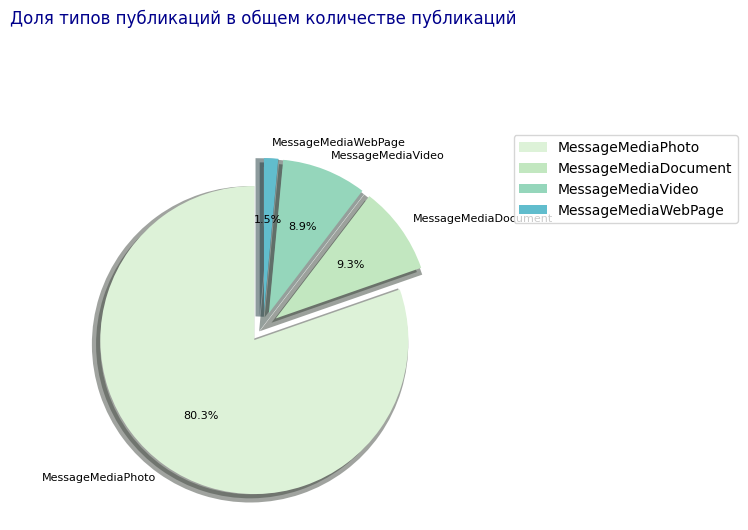

In [54]:
# Построим круговую диаграмму кол-во публикаций в разрезе типов
plt.figure(figsize=(5, 5))
explode = [0.1]*df_type_attachment['type_attachment'].nunique()
colors = sns.color_palette('GnBu')
plt.pie(df_type_attachment['count'],
        labels = df_type_attachment['type_attachment'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':8},
        wedgeprops = {'linewidth': 6},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля типов публикаций в общем количестве публикаций', loc='center', size=12, color='darkblue', pad=80)
plt.legend(df_type_attachment['type_attachment'].unique(), bbox_to_anchor=( 1.15 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

In [55]:
# Создадим сводную таблицу на базе innopolistg_emoji тип публикации - активности пользователей
df_type_attachment_actions = innopolistg_emoji.pivot_table(index='type_attachment', values=['views', 'reactions_count', 'comments'], aggfunc={'views':'mean', 'reactions_count':'mean', 'comments':'mean'}).round(2)
df_type_attachment_actions.columns = ['mean_comments', 'mean_reactions_count', 'mean_views']
df_type_attachment_actions = df_type_attachment_actions.sort_values(by='mean_views', ascending=False)
(
    df_type_attachment_actions
    .style
    .background_gradient(cmap='GnBu', axis=0)
)

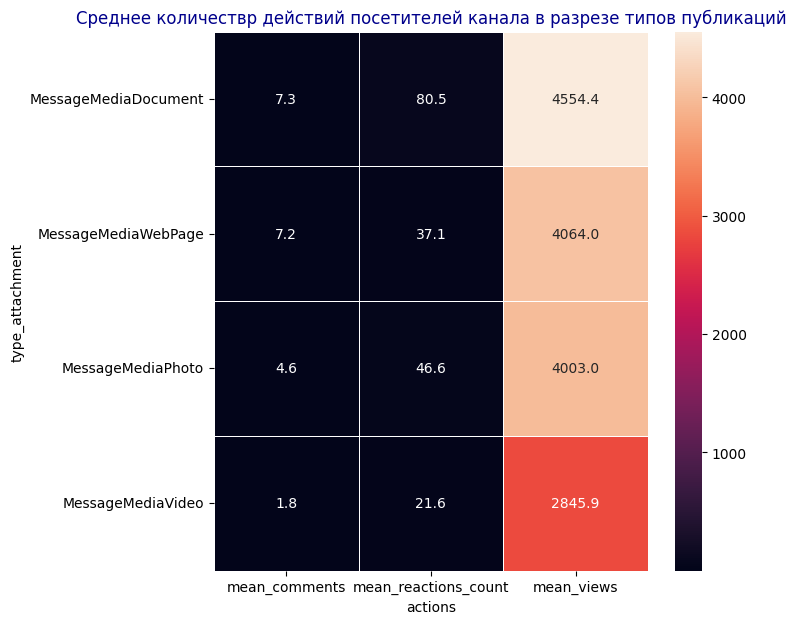

In [56]:
# Построим heatmap тип публикации - действия посетителей
plt.figure(figsize=(7, 7))
ax = sns.heatmap(df_type_attachment_actions, annot=True, linewidth=.5, fmt=".1f")
ax.set(xlabel="actions", ylabel="type_attachment")
#ax.xaxis.tick_top()
plt.title('Среднее количествр действий посетителей канала в разрезе типов публикаций', color = 'darkblue')
plt.show()

In [57]:
# Преобразуем сводную таблицу df_type_attachment_actions для построения графика
temp_actions = pd.melt(df_type_attachment_actions.reset_index(), id_vars=['type_attachment'], value_vars=['mean_views', 'mean_reactions_count', 'mean_comments'])
temp_actions.columns = ['type_attachment', 'actions', 'quantity']

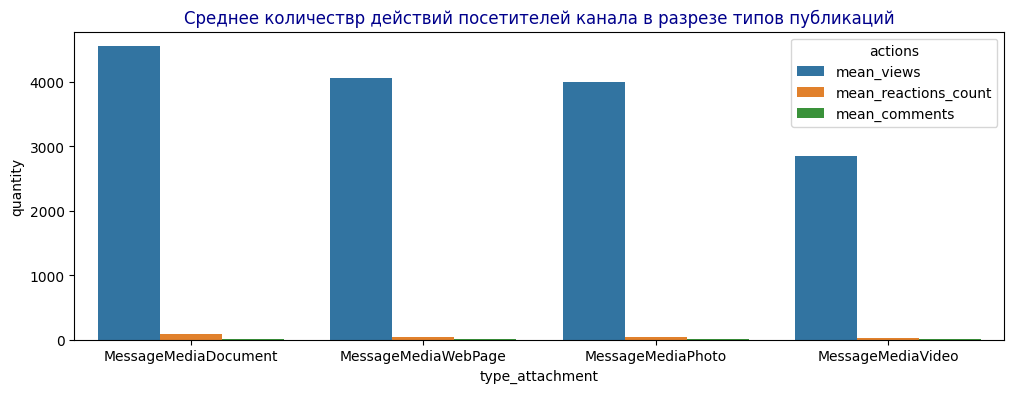

In [58]:
# Построим столбчатый график тип публикации - количество действий пользователей
plt.figure(figsize=(12, 4))
sns.barplot(temp_actions, x="type_attachment", y="quantity", hue='actions')
plt.title('Среднее количествр действий посетителей канала в разрезе типов публикаций', color = 'darkblue')
plt.show()

_____
_________

**Промежуточный вывод:**
- самый распространенный тип постов MessageMediaPhoto - 80%;
- самый редкий тип постов MessageMediaWebPage - 1.5%;
- самое большое количество просмотров, откликов и реакций имеет тип поста MessageMediaDocument;
- меньше других просмотров, откликов и реакций имеет тип поста MessageMediaVideo.

Аудитория тг канала innapolistg любит читать и активно реагирует на MessageMediaDocument, следовательно можно наращивать долю этого типа постов за счет снижения доли постов типа MessageMediaPhoto.

Для канала характерна низкая вовлеченность аудитории при хорошем показателе охвата. Подписчики канала просматривают посты, но не проявлюят желания ставить эмоджи или оставлять комментарии. Хорошо бы разбавить информационных стиль канала постами, которые можно "почитать".

___________
___________

### **3.2. Частотный анализ текста постов и облако слов**

https://habr.com/ru/articles/517410/

#### **3.2.1. Установка и импорт библиотек**

In [59]:
pip install wordcloud pandas

In [60]:
# Импортируем WordCloud
from wordcloud import WordCloud

In [61]:
pip install wordcloud pandas

In [62]:
# Импортируем WordCloud
from wordcloud import WordCloud

In [63]:
#Используем стандартный набор символов пунктуации из модуля string:
import string

In [64]:
#токенизация
from nltk import word_tokenize

In [65]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords # если первый код выдает ошибку

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [67]:
pip install pymorphy2

In [68]:
import pymorphy2

#### **3.2.2. Предварительная обработка (препроцессинг) текста**

In [69]:
# Объединение текста из всех строк в одну переменную
all_text = ' '.join(innopolistg['text'].tolist())
all_text

'1. Университет Иннополис [открыл штаб-квартиру](https://media.innopolis.university/news/iu-china-office/) в китайском Ханчжоу\n2. ChatGPT [отвечает лучше](https://habr.com/ru/news/778022/), если предложить ему чаевые\n3. [Исследование ЕЦБ](https://www.reuters.com/technology/ai-threatens-wages-not-jobs-so-far-ecb-paper-finds-2023-11-28/): ИИ угрожает не рабочим местам, а зарплатам\n4. 60% компаний используют Excel для [управления бизнес-процессами](https://habr.com/ru/companies/lanit/news/777554/)\n5. «Ростелеком» [разрабатывает](https://www.cnews.ru/news/top/2023-11-28_rostelekom_stroit_zamenu) свою Figma\n6. [Разработан алгоритм](https://source.wustl.edu/2023/11/defending-your-voice-against-deepfakes/) для защиты голоса от создания дипфейков\n7. ИИ-помощник Great Leveler [сдал тест](https://rb.ru/news/great-leveler/) на лицензию врача в США Провели дискуссию о будущем туризма в Иннополисе вместе с Городскими модераторами\n\nМы много и интересно спорили. Вот главные тезисы:\n\n• Инноп

In [70]:
# Приведем текст к единому нижнему регистру
text = all_text.lower()

In [71]:
# Строка знаков пунктуации из библиотеки string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [72]:
#Добавим к знакам пунктуации символы переноса строки, табуляции и другие символы, которые встречаются в нашем исходном тексте (например, символ с кодом \xa0):
spec_chars = string.punctuation + '\n\xa0«»\t—…'

In [73]:
# Объявим функцию, удаляющую специальные символы и цифр из нашего текста
def remove_chars(text, chars):
    return "".join([_ for _ in text if _ not in chars])

In [74]:
# Удалим из текста специальные символы
text = remove_chars(text, spec_chars)
text

'1 университет иннополис открыл штабквартируhttpsmediainnopolisuniversitynewsiuchinaoffice в китайском ханчжоу2 chatgpt отвечает лучшеhttpshabrcomrunews778022 если предложить ему чаевые3 исследование ецбhttpswwwreuterscomtechnologyaithreatenswagesnotjobssofarecbpaperfinds20231128 ии угрожает не рабочим местам а зарплатам4 60 компаний используют excel для управления бизнеспроцессамиhttpshabrcomrucompanieslanitnews7775545 ростелеком разрабатываетhttpswwwcnewsrunewstop20231128rostelekomstroitzamenu свою figma6 разработан алгоритмhttpssourcewustledu202311defendingyourvoiceagainstdeepfakes для защиты голоса от создания дипфейков7 иипомощник great leveler сдал тестhttpsrbrunewsgreatleveler на лицензию врача в сша провели дискуссию о будущем туризма в иннополисе вместе с городскими модераторамимы много и интересно спорили вот главные тезисы• иннополису нужно уникальное флагманское культурное событие• не хватает камерных мероприятий с амбассадорами города• в городе зайдет геймификационный тури

In [75]:
# Строка цифр из библиотеки string
string.digits

'0123456789'

In [76]:
# Удалим из текста цифры
text = remove_chars(text, string.digits)
text

' университет иннополис открыл штабквартируhttpsmediainnopolisuniversitynewsiuchinaoffice в китайском ханчжоу chatgpt отвечает лучшеhttpshabrcomrunews если предложить ему чаевые исследование ецбhttpswwwreuterscomtechnologyaithreatenswagesnotjobssofarecbpaperfinds ии угрожает не рабочим местам а зарплатам  компаний используют excel для управления бизнеспроцессамиhttpshabrcomrucompanieslanitnews ростелеком разрабатываетhttpswwwcnewsrunewstoprostelekomstroitzamenu свою figma разработан алгоритмhttpssourcewustledudefendingyourvoiceagainstdeepfakes для защиты голоса от создания дипфейков иипомощник great leveler сдал тестhttpsrbrunewsgreatleveler на лицензию врача в сша провели дискуссию о будущем туризма в иннополисе вместе с городскими модераторамимы много и интересно спорили вот главные тезисы• иннополису нужно уникальное флагманское культурное событие• не хватает камерных мероприятий с амбассадорами города• в городе зайдет геймификационный туризм готовая идея для стартапа 😉• разработка 

#### **3.2.3. Токенизация текста**

Для последующей обработки очищенный текст необходимо разбить на составные части – токены. Процесс разбиения называется токенизация. Для нашей задачи частотного анализа необходимо разбить текст на слова.

In [77]:
# Создадим список слов - токенов
text_tokens = word_tokenize(text)

In [78]:
# Узнаем длину списка слов
len(text_tokens)

21664

In [79]:
# Выведем первые 10 слов
text_tokens[:10]

['университет',
 'иннополис',
 'открыл',
 'штабквартируhttpsmediainnopolisuniversitynewsiuchinaoffice',
 'в',
 'китайском',
 'ханчжоу',
 'chatgpt',
 'отвечает',
 'лучшеhttpshabrcomrunews']

In [80]:
# Приведем список токенов к объекту класса Текст
text = nltk.Text(text_tokens)
type(text)

nltk.text.Text

In [81]:
# Выведем первые 10 слов
text[:10]

['университет',
 'иннополис',
 'открыл',
 'штабквартируhttpsmediainnopolisuniversitynewsiuchinaoffice',
 'в',
 'китайском',
 'ханчжоу',
 'chatgpt',
 'отвечает',
 'лучшеhttpshabrcomrunews']

#### **3.2.4. Подсчёт статистики встречаемости слов в тексте**

In [82]:
# рассчитаем статистики распределения частот слов в тексте с помощью класса FreqDist
from nltk.probability import FreqDist
fdist = FreqDist(text)
fdist

FreqDist({'в': 890, 'и': 649, 'на': 422, 'для': 271, 'с': 253, 'иннополис': 232, 'по': 187, 'из': 121, 'о': 102, 'не': 99, ...})

In [83]:
# Выведем 5 наиболее часто встречающихся слов
fdist.most_common(5)

[('в', 890), ('и', 649), ('на', 422), ('для', 271), ('с', 253)]

In [84]:
len(fdist)

9010

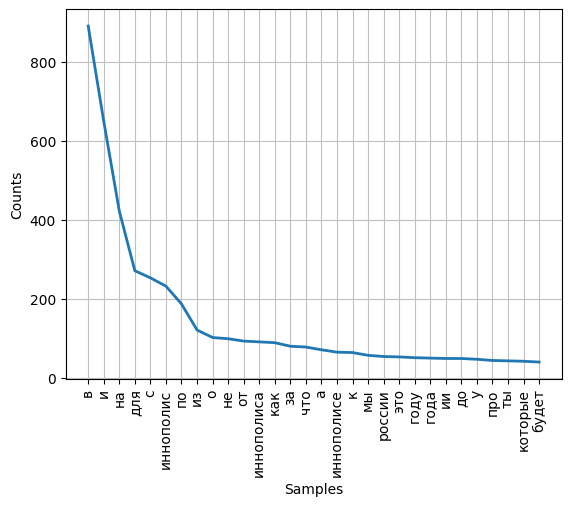

In [85]:
# Построим график частотности слов
fdist.plot(30,cumulative=False);

#### **3.2.5. Удаление стоп-слов**

К стоп-словам (или шумовым словам), как правило, относят предлоги, союзы, междометия, частицы и другие части речи, которые часто встречаются в тексте, являются служебными и не несут смысловой нагрузки – являются избыточными.

Библиотека NLTK содержит готовые списки стоп-слов для различных языков. Получим список сто-слов для русского языка:

In [86]:
# Загрузка списка (множества) русских стоп-слов
russian_stopwords = stopwords.words("russian")
print(len(russian_stopwords))
russian_stopwords[:10]

151


['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со']

In [87]:
# Расширим список стоп-слов
russian_stopwords.extend(['это', 'еще', 'который', 'россия', 'ия'])
print(len(russian_stopwords))

156


In [88]:
# Удаление стоп-слов из текста
filtered_tokens = [word for word in text if word not in russian_stopwords]
filtered_tokens[:20]

['университет',
 'иннополис',
 'открыл',
 'штабквартируhttpsmediainnopolisuniversitynewsiuchinaoffice',
 'китайском',
 'ханчжоу',
 'chatgpt',
 'отвечает',
 'лучшеhttpshabrcomrunews',
 'предложить',
 'чаевые',
 'исследование',
 'ецбhttpswwwreuterscomtechnologyaithreatenswagesnotjobssofarecbpaperfinds',
 'ии',
 'угрожает',
 'рабочим',
 'местам',
 'зарплатам',
 'компаний',
 'используют']

In [89]:
# Удалим url из текста
filtered_tokens = [(word if 'http' not in word else word[:word.find('http')]) for word in filtered_tokens]
filtered_tokens[:20]

['университет',
 'иннополис',
 'открыл',
 'штабквартиру',
 'китайском',
 'ханчжоу',
 'chatgpt',
 'отвечает',
 'лучше',
 'предложить',
 'чаевые',
 'исследование',
 'ецб',
 'ии',
 'угрожает',
 'рабочим',
 'местам',
 'зарплатам',
 'компаний',
 'используют']

In [90]:
len(filtered_tokens)

16635

In [91]:
fdist = FreqDist(filtered_tokens)
fdist.most_common(10)

[('иннополис', 259),
 ('иннополиса', 95),
 ('иннополисе', 67),
 ('ии', 58),
 ('года', 55),
 ('', 55),
 ('россии', 55),
 ('году', 51),
 ('разработчик', 51),
 ('которые', 42)]

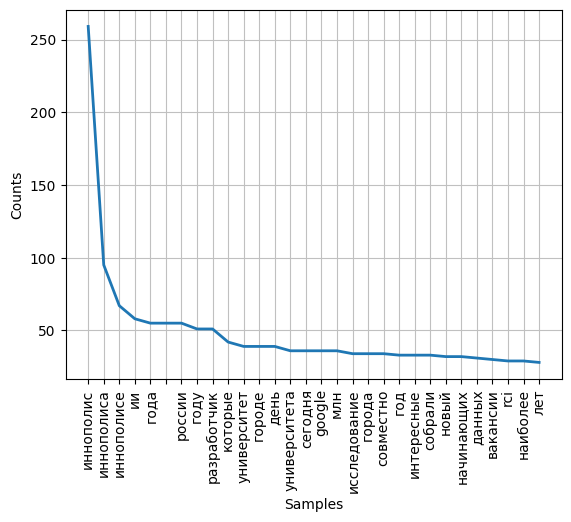

In [92]:
# Построим график частотности слов
fdist.plot(30,cumulative=False);

In [93]:
# Объединение токенов обратно в текст
filtered_text = ' '.join(filtered_tokens)

In [94]:
# Создание облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

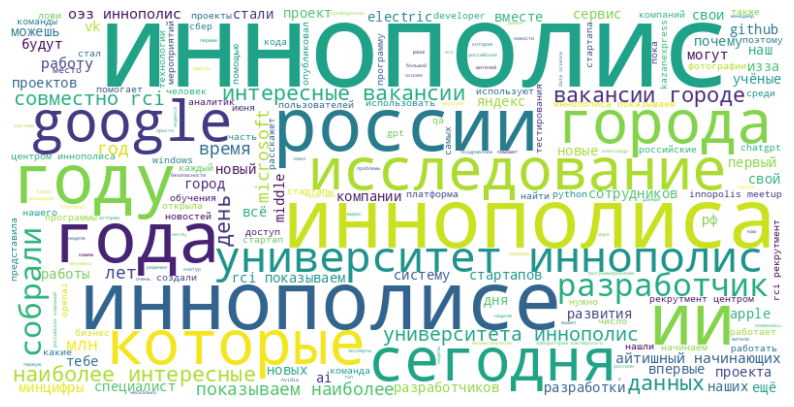

In [95]:
# Отображение облака слов
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### **3.2.6. Лемматизация**

Лемматизация — процесс приведения словоформы к лемме — её нормальной (словарной) форме.

In [96]:
# Создание объекта для работы с морфологией
morph = pymorphy2.MorphAnalyzer()

In [97]:
# Токенизация текста
tokens = word_tokenize(filtered_text)

In [98]:
# Лемматизация каждого токена
lemmatized_tokens = [morph.parse(token)[0].normal_form for token in tokens]

In [99]:
# Удалим стоп-слова после леммизации
lemmatized_tokens = [token for token in lemmatized_tokens if token not in russian_stopwords]

#### **3.2.7. Финальная визуализация популярности слов - облако слов**

In [100]:
# Узнаем 20 самых любим слов авторов блога и их количество в наших публикациях
fdist = FreqDist(lemmatized_tokens)
top_words = fdist.most_common(20)
top_words

[('иннополис', 427),
 ('год', 171),
 ('новый', 108),
 ('город', 103),
 ('наш', 90),
 ('университет', 89),
 ('разработчик', 80),
 ('проект', 78),
 ('день', 71),
 ('компания', 62),
 ('первый', 62),
 ('работа', 62),
 ('свой', 59),
 ('стартап', 57),
 ('мочь', 57),
 ('создать', 57),
 ('стать', 54),
 ('российский', 47),
 ('пройти', 44),
 ('самый', 43)]

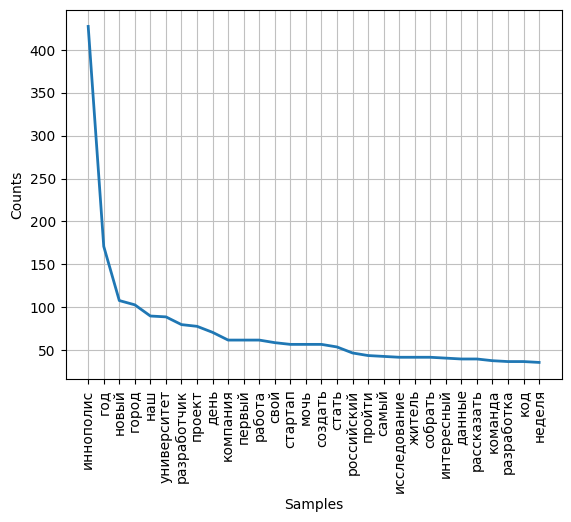

In [94]:
# Построим график частотности слов
fdist.plot(30,cumulative=False);

In [100]:
# Объединение лемматизированных токенов обратно в текст (если нужно)
lemmatized_text = ' '.join(lemmatized_tokens)

In [102]:
# Создание облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lemmatized_text)

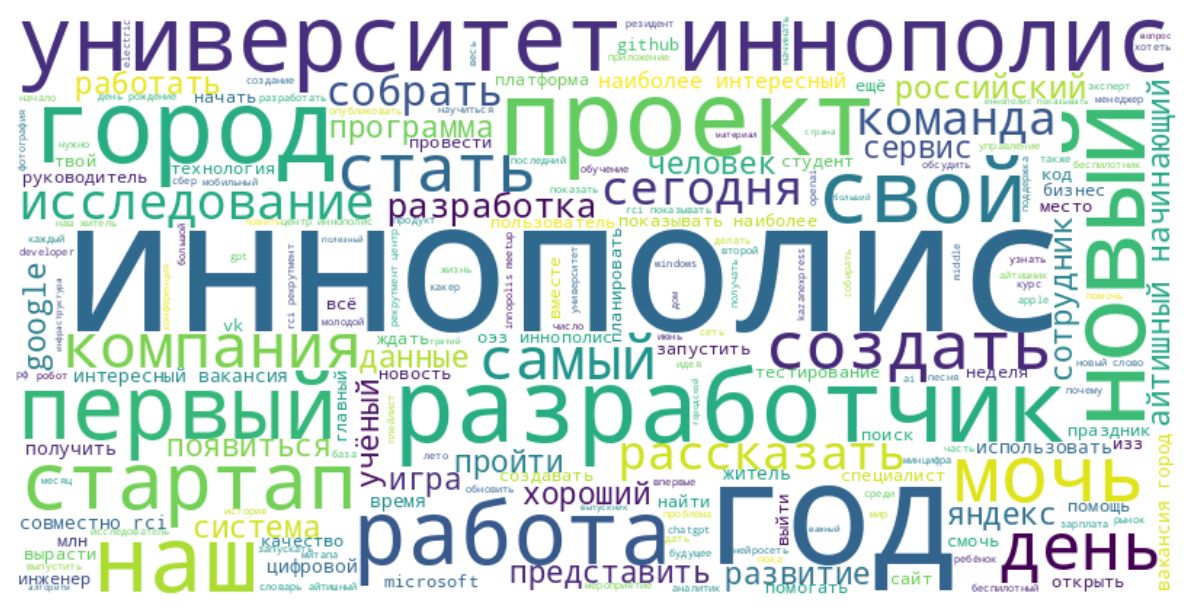

In [103]:
# Отображение облака слов
plt.figure(figsize=(10, 8),dpi=150)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

______________
______________
**Промежуточный вывод:**

Мы нашли самые популярные у автора канала слова. Облако слов говорит о том, что в канале используется сухой информационный стиль. В относительно коротких публикациях постоянно повторяются:

- существительные: Иннополис, город, университет, проект, разработчик, стартап;
- прилогательные: новый, самый, российский;
- глаголы: создать,стать, пройти.

Не думаю, что эти слова заставят кого-то переехать или эмоционально откликнуться на пост. Слишком сухо!
Обычно люди отзеркаливают эмоции друг друга - нет эмоций в тексте поста, нет эмоционального отклика у читающих. Нет эмоционального отклика у читающих - пост тут же забыт и никакого мыслительного процесса после его прочтения тоже нет.

Каналу нужно четко определиться с конечной целью постов. Если цель поста - донести только информацию о каком-либо событии, то стиль канала хорошо подобран. Однако такие каналы большой аудитории не набирают.
____________
___________

### **3.3. Частотный анализ текста комментариев и облако слов**

In [107]:
# Создадим список из тексов комментариев
all_comments = [_ for _ in comments['text_comment'].copy().dropna().tolist() if _.isdigit()==False]

In [108]:
# Объединеним текст из всех строк в одну переменную
all_text_comments = ' '.join(all_comments)
all_text_comments

'💔 Предлагаю также в других номинациях голосовать за Yummy Music потому что ребята просто 🔥🔥🔥 и Sviaga Glamping потому что они у нас тут рядышком и тоже молодцы)) ❤️ Очень интересное сотрудничество! Уверен, что в адвент-календаре Иннополиса будут самые необычные и оригинальные подарки. Жду с нетерпением открытия! 🎁🎅🎄 Обои с календариком на декабрь для мобилы/десктопа выходили уже? Они лежат в адвент-календаре за 1 декабря 🙃\ninnoadvent.ru Но там нет именно с календариком.... Такого Оно оказалось офигенное удобно. Пользуюсь с сентября Где обои декабрьские Их можно найти в адвент-календаре за 1 декабря 🤗\ninnoadvent.ru/ Подскажите, пожалуйста, где можно найти фотографии с DataScience митапа, котоый вот на первой фотке в этом посте? Привет Иннополис, когда ждать календарики? А ещё,  было бы здорово организовать " слет камперов" со всей РФ и ближних дружественных, которые расположились бы в живописнейших окрестностях Иннополиса и близ Макарьевского монастыря вдоль Волги... а в сам Иннополи

In [109]:
# Приведем текст к единому нижнему регистру
all_text_comments = all_text_comments.lower()

In [110]:
# Удалим из текста специальные символы
all_text_commentst = remove_chars(all_text_comments, spec_chars)

In [111]:
# Удалим из текста цифры
all_text_commentst = remove_chars(all_text_commentst, string.digits)

In [112]:
# Создадим список слов - токенов
commentst_tokens = word_tokenize(all_text_commentst)

In [113]:
# Приведем список токенов к объекту класса Текст
text_tokens = nltk.Text(commentst_tokens)

In [114]:
# Удаление стоп-слов из текста
filtered_text_tokens = [word for word in text_tokens if word not in russian_stopwords]

In [115]:
# Удалим url из текста
filtered_text_tokens = [(word if 'http' not in word else word[:word.find('http')]) for word in filtered_text_tokens]

In [116]:
# Лемматизация каждого токена
lemmatized_text_tokens = [morph.parse(token)[0].normal_form for token in filtered_text_tokens]

In [117]:
# Удалим стоп-слова после леммизации
lemmatized_text_tokens = [token for token in lemmatized_text_tokens if token not in russian_stopwords]

In [118]:
# Узнаем 20 самых популярных слов в откликах читателей канала
fdist_commentst = FreqDist(lemmatized_text_tokens)
fdist_commentst.most_common(20)

[('иннополис', 210),
 ('город', 131),
 ('спасибо', 102),
 ('день', 83),
 ('человек', 76),
 ('автобус', 73),
 ('год', 69),
 ('очень', 68),
 ('хотеть', 58),
 ('мочь', 57),
 ('ещё', 53),
 ('добрый', 51),
 ('весь', 48),
 ('всё', 48),
 ('пожалуйста', 47),
 ('праздник', 47),
 ('казань', 45),
 ('новый', 42),
 ('🙌', 41),
 ('свой', 41)]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128588 (\N{PERSON RAISING BOTH HANDS IN CELEBRATION}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


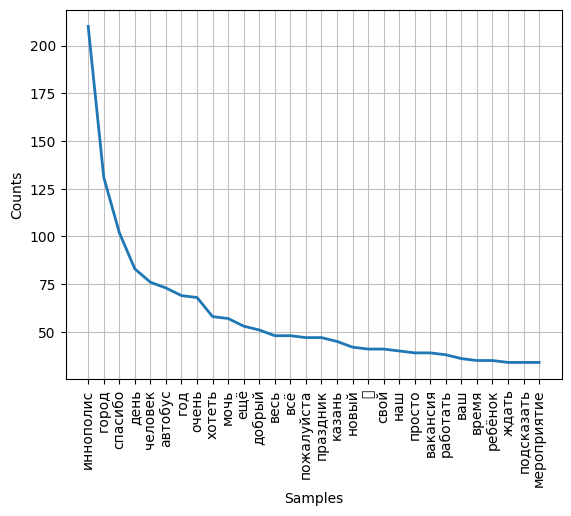

In [119]:
# Построим график частотности слов
fdist_commentst.plot(30,cumulative=False);

In [120]:
# Объединение лемматизированных токенов обратно в текст (если нужно)
lemmatized_text_commentst = ' '.join(fdist_commentst)

In [112]:
# Создание облака слов
wordcloud_commentst = WordCloud(width=800, height=400, background_color='white').generate(lemmatized_text_commentst)

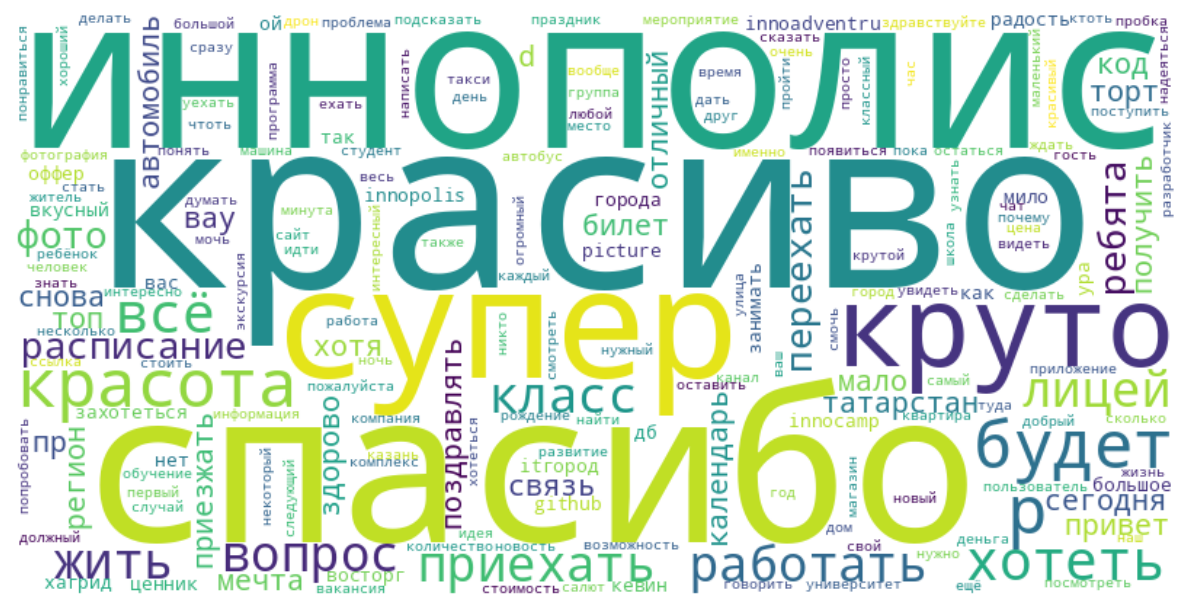

In [113]:
# Отображение облака слов
plt.figure(figsize=(10, 8),dpi=150)
plt.imshow(wordcloud_commentst, interpolation='bilinear')
plt.axis('off')
plt.show()

______________
______________
**Промежуточный вывод:**

Мы нашли самые популярные у читателей канала слова, оставивших комментарии к словам.

Налицо отзеркаливание. Самое популярное слово автора канала - Иннополис, самое популярное слово в комментариях - Иннополис.

Читатели доброжилательны и вежливы: спасибо, красиво, круто, супер...НО!!! дальше за этими словами мы обычно говорим "До свидания" и уходим, забыв о теме.

Видно, что кто-то высказывает пожелание приехать жить и работать. Но это тоже похоже на общие слова.

Мне бы хотелось видеть больше вопросительных местоимений. Настоящий интерес показывают не слова благодарности, а вопросы. Думая над чем-то серьезно, человек задает специальные вопросы и ждет на них развернутого ответа.

__________________
__________________

### **3.4. Темы**

In [114]:
del_chars = spec_chars.replace(',', '').replace(';', '').replace('!', '').replace('?', '').replace('.', '').replace('-', '')

In [115]:
def text_cleaner(s):
    s = s.lower()
    s = remove_chars(s, del_chars)
    s = remove_chars(s, string.digits)
    text = [(word if 'http' not in word else word[:word.find('http')]) for word in s.split()]
    s_clean = ' '.join(text)
    return s_clean

In [116]:
def rubric_maker(s):
    if s[:2] == '1.':
      return 'инновости'
    elif 'вакансии' in s:
      return 'вакансии иннополиса'
    elif 'айтишный для начинающих' in s:
      return 'айтишный словарь'
    else:
      return 'вне рубрики'

In [117]:
def topic_maker(s):
    if s[:2] == '1.':
      return 'новости'
    elif 'вакансии' in s:
      return 'вакансии'
    elif 'айтишный для начинающих' in s:
      return 'словарь'
    elif ('туризм' in s) or ('турист' in s) or ('достопримечат' in s):
      return 'туризм'
    elif ('митап' in s) or ('форум' in s):
      return 'анонс митапа/форума'
    elif ('поздравл' in s) or ('праздник' in s):
      return 'поздравление с праздником'
    elif 'приглаш' in s:
      return 'приглашение на мероприятия'
    elif (('план' in s) and ('недел' in s)) or (('план' in s) and ('событ' in s)):
      return 'приглашение на мероприятия'
    elif 'ниверситет' in s:
      return 'новости университета'
    elif ('ИИ' in s) or ('AI' in s):
      return 'искусственный интеллект'
    else:
      return 'прочие'

In [118]:
innopolistg['text_clean'] = innopolistg['text'].apply(text_cleaner)

In [119]:
innopolistg['text_rubric'] = innopolistg['text'].apply(rubric_maker)

In [120]:
innopolistg['text_topic'] = innopolistg['text'].apply(topic_maker)

In [121]:
innopolistg.head(2)

id                date  \
0  1414 2023-12-04 09:31:49   
1  1407 2023-12-01 14:40:01   

                                                text   views  reactions_count  \
0  1. Университет Иннополис [открыл штаб-квартиру...  1445.0               31   
1  Провели дискуссию о будущем туризма в Иннополи...  2234.0               51   

   comments    type_attachment  \
0         0  MessageMediaPhoto   
1         2  MessageMediaPhoto   

                                          text_clean  text_rubric text_topic  
0  . университет иннополис открыл штаб-квартиру в...    инновости    новости  
1  провели дискуссию о будущем туризма в иннополи...  вне рубрики     туризм

In [122]:
innopolistg['text_rubric'].value_counts()

вне рубрики            412
инновости               69
вакансии иннополиса     30
айтишный словарь        25
Name: text_rubric, dtype: int64

In [123]:
innopolistg['text_topic'].value_counts()

прочие                        284
новости                        69
новости университета           50
вакансии                       30
словарь                        25
анонс митапа/форума            23
поздравление с праздником      23
искусственный интеллект        16
туризм                          8
приглашение на мероприятия      8
Name: text_topic, dtype: int64

In [124]:
# Создадим сводную таблицу кол-во публикаций в разрезе рубрик
df_rubric_attachment = innopolistg.pivot_table(index='text_rubric', values='id', aggfunc='count').reset_index()
df_rubric_attachment.columns = ['rubric_attachment', 'count']
df_rubric_attachment = df_rubric_attachment.sort_values(by='count', ascending=False)
(
    df_rubric_attachment
    .style
    .background_gradient(cmap='GnBu', axis=0)
)

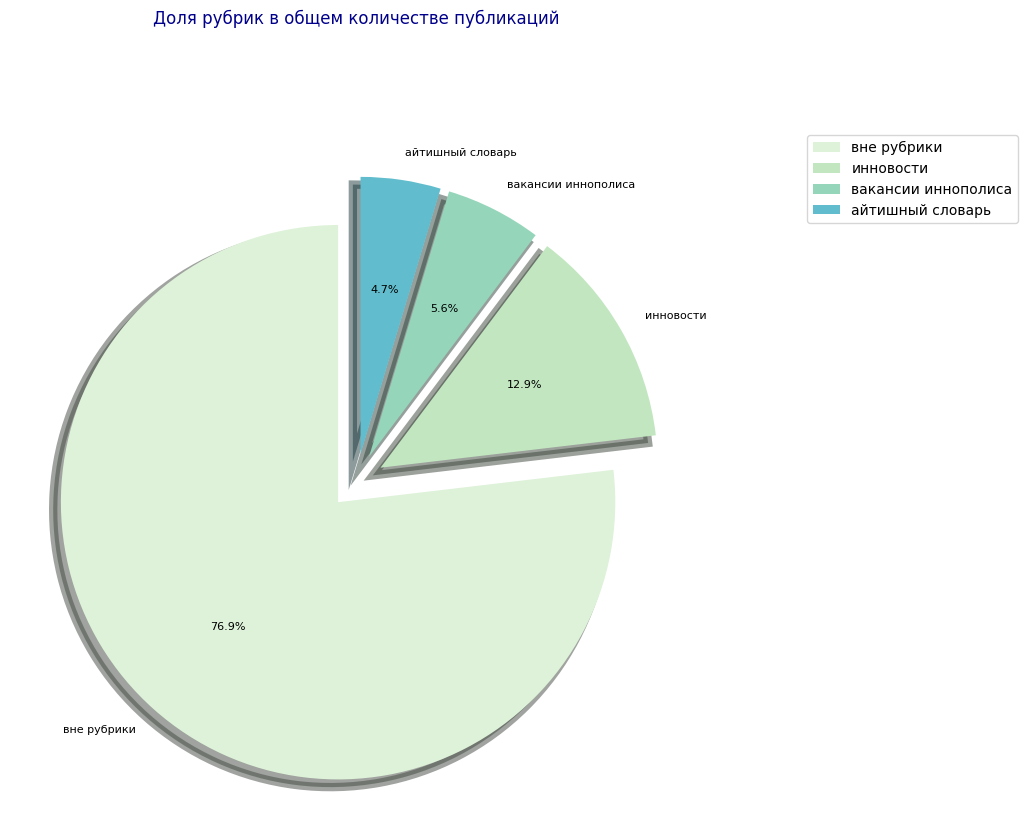

In [125]:
# Построим круговую диаграмму кол-во публикаций в разрезе рубрик
plt.figure(figsize=(9, 9))
explode = [0.1]*df_rubric_attachment['rubric_attachment'].nunique()
colors = sns.color_palette('GnBu')
plt.pie(df_rubric_attachment['count'],
        labels = df_rubric_attachment['rubric_attachment'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':8},
        wedgeprops = {'linewidth': 6},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля рубрик в общем количестве публикаций', loc='center', size=12, color='darkblue', pad=80)
plt.legend(df_rubric_attachment['rubric_attachment'].unique(), bbox_to_anchor=( 1.15 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

In [126]:
# Создадим сводную таблицу кол-во публикаций в разрезе тем
df_topic_attachment = innopolistg.pivot_table(index='text_topic', values='id', aggfunc='count').reset_index()
df_topic_attachment.columns = ['text_topic', 'count']
df_topic_attachment = df_topic_attachment.sort_values(by='count', ascending=False)
(
    df_topic_attachment
    .style
    .background_gradient(cmap='GnBu', axis=0)
)

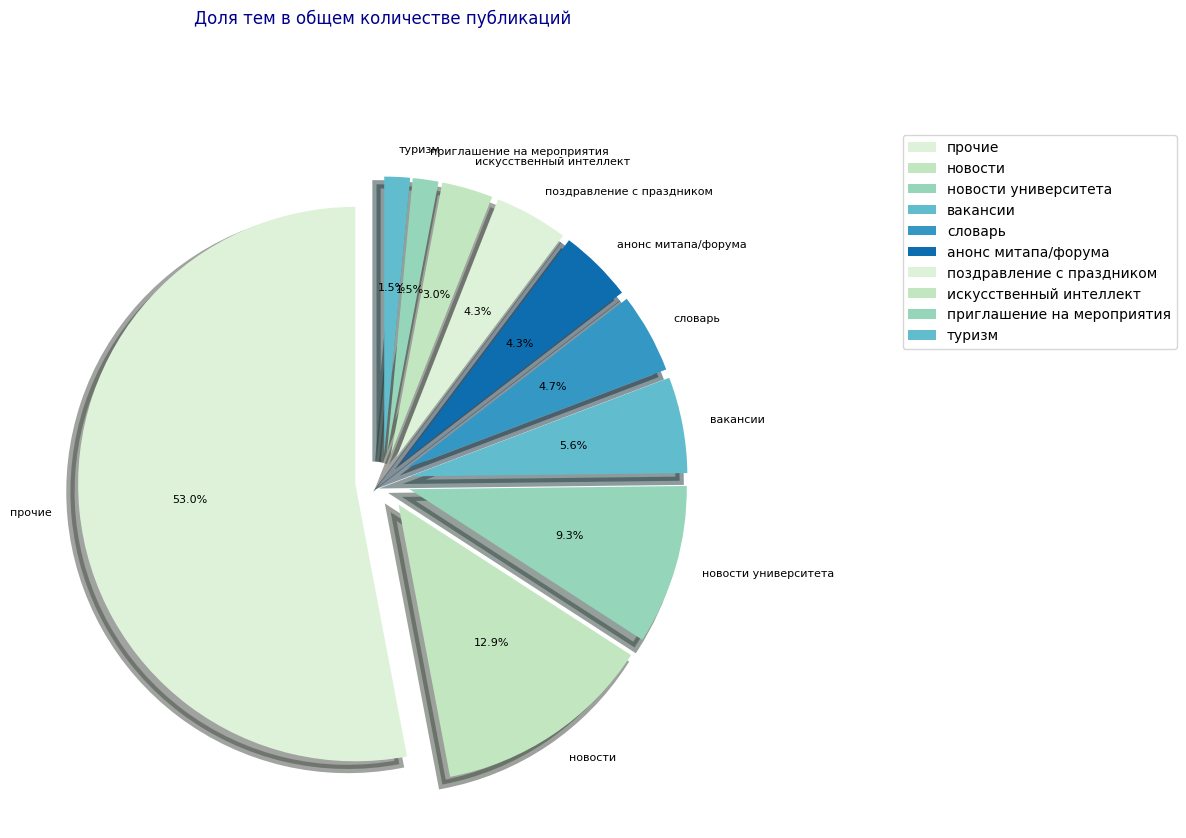

In [127]:
# Построим круговую диаграмму кол-во публикаций в разрезе рубрик
plt.figure(figsize=(9, 9))
explode = [0.1]*df_topic_attachment['text_topic'].nunique()
colors = sns.color_palette('GnBu')
plt.pie(df_topic_attachment['count'],
        labels = df_topic_attachment['text_topic'].unique(),
        colors = colors,
        autopct = '%0.1f%%',
        explode = explode,
        shadow = 'True',
        startangle = 90,
        textprops = {'color': 'black','fontsize':8},
        wedgeprops = {'linewidth': 6},
        #frame = 'true',
        center = (0.1,0.1),
        rotatelabels = False)
plt.title('Доля тем в общем количестве публикаций', loc='center', size=12, color='darkblue', pad=80)
plt.legend(df_topic_attachment['text_topic'].unique(), bbox_to_anchor=( 1.25 , 1 ), loc='upper left', borderaxespad= 0)
plt.show()

### **3.5. Анализ объема текста**

___________
___________

**Пояснения**

Максимальная длина текста в посте — 4096 символов. Если длина текста превышает это значение, он автоматически разделится на две публикации.

Максимальная длина текста в посте с прикрепленными файлами — 1024 символа.

Для того, чтобы узнать количество слов в Телеграмме, нужно считать каждое слово, каждую группу цифр, каждую смешанную группу знаков или отдельный знак. Перед каждым словом, группой цифр или знаком, перед которыми или после которых имеется дефис «-», пробел (или начало и конец строки), следует считать отдельное слово.

Важно не количество символов, а суть поста, насколько тема актуальна и интересно написана. Рекомендуют не делать посты, длина которых превышает 2000 символов.

Если ваш пост оказался коротким, то не стоит лить воду и пытаться его растянуть.
____________
___________


In [128]:
innopolistg['count_words'] = innopolistg['text_clean'].copy(deep=True)
innopolistg['count_words'] = innopolistg['count_words'].apply(lambda x: len(x.split()))

In [129]:
innopolistg['count_words_2'] = innopolistg['text_clean'].copy(deep=True)
innopolistg['count_words_2'] = innopolistg['count_words_2'].apply(lambda x: x.count(" ") + 1)

In [130]:
import re
innopolistg['count_words_3'] = innopolistg['text_clean'].copy(deep=True)
innopolistg['count_words_3'] = innopolistg['count_words_3'].apply(lambda x: len(re.findall(r'\b\w+\b', x)))

In [131]:
innopolistg['count_symbol'] = innopolistg['text_clean'].copy(deep=True)
innopolistg['count_symbol'] = innopolistg['count_symbol'].apply(lambda x: len(x))
innopolistg.head(6)

id                date  \
0  1414 2023-12-04 09:31:49   
1  1407 2023-12-01 14:40:01   
2  1406 2023-12-01 04:16:17   
3  1404 2023-11-30 14:05:01   
4  1403 2023-11-29 16:05:06   
5  1395 2023-11-28 12:35:08   

                                                text   views  reactions_count  \
0  1. Университет Иннополис [открыл штаб-квартиру...  1445.0               31   
1  Провели дискуссию о будущем туризма в Иннополи...  2234.0               51   
2  Настала пора открывать подарки\n\nПоговаривают...  2823.0              109   
3  **Новогодний адвент-календарь** **Иннополиса**...  3284.0              120   
4  Начинаем вечер-дискуссию о туризме в Иннополис...  4350.0               31   
5  Завтра большая и важная дискуссия для нашего г...  4171.0               38   

   comments    type_attachment  \
0         0  MessageMediaPhoto   
1         2  MessageMediaPhoto   
2         2  MessageMediaPhoto   
3        10  MessageMediaPhoto   
4         1  MessageMediaPhoto   
5         5  MessageMediaPhoto   

                                          text_clean  text_rubric text_topic  \
0  . университет иннополис открыл штаб-квартиру в...    инновости    новости   
1  провели дискуссию о будущем туризма в иннополи...  вне рубрики     туризм   
2  настала пора открывать подаркипоговаривают дед...  вне рубрики     прочие   
3  новогодний адвент-календарь иннополиса месяц п...  вне рубрики     прочие   
4  начинаем вечер-дискуссию о туризме в иннополис...  вне рубрики     туризм   
5  завтра большая и важная дискуссия для нашего г...  вне рубрики     туризм   

   count_words  count_words_2  count_words_3  count_symbol  
0           52             52             54           394  
1           50             50             49           408  
2           32             32             34           243  
3           64             64             70           483  
4            7              7              9            65  
5           62             62             63           478

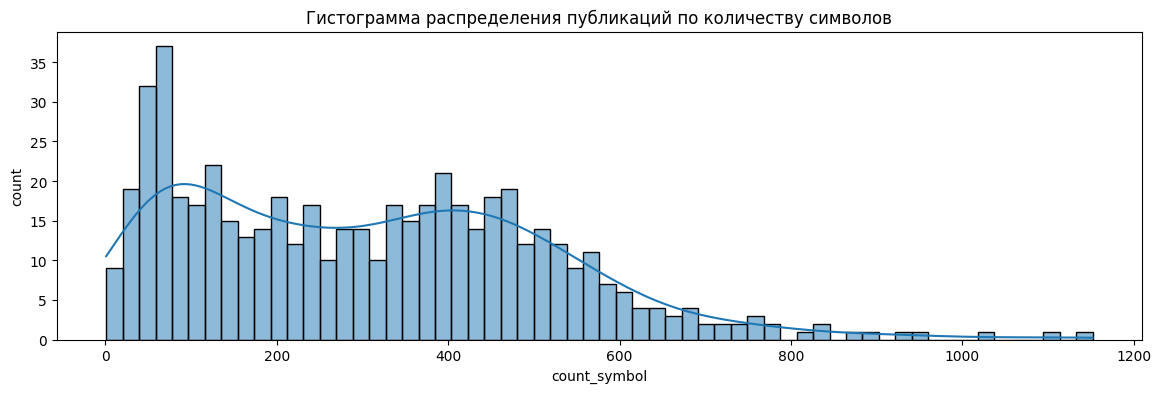

In [135]:
plt.figure(figsize=(14, 4))
sns.histplot(x = innopolistg['count_symbol'], bins=60, kde=True)
plt.title('Гистограмма распределения публикаций по количеству символов')
plt.xlabel('count_symbol')
plt.ylabel('count')
plt.show;

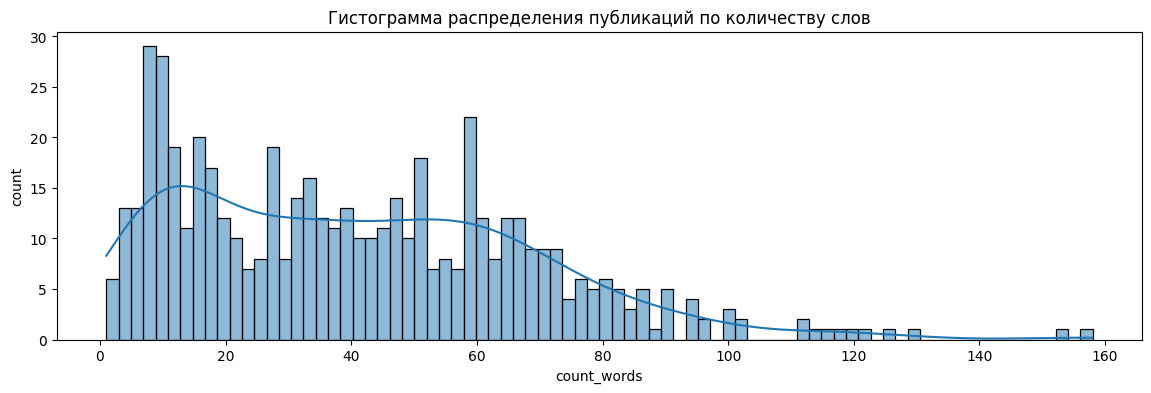

In [136]:
plt.figure(figsize=(14, 4))
sns.histplot(x = innopolistg['count_words'], bins=80, kde=True)
plt.title('Гистограмма распределения публикаций по количеству слов')
plt.xlabel('count_words')
plt.ylabel('count')
plt.show;

In [138]:
#innopolistg['text']

In [ ]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 4.2 MB/s eta 0:00:00


In [ ]:
import emoji

In [ ]:
innopolistg['count_emoji'] = innopolistg['text'].copy(deep=True)
innopolistg['count_emoji'] = innopolistg['count_emoji'].apply(lambda x: emoji.emoji_count(x))
innopolistg.head(6)

id                date  \
0  1414 2023-12-04 09:31:49   
1  1407 2023-12-01 14:40:01   
2  1406 2023-12-01 04:16:17   
3  1404 2023-11-30 14:05:01   
4  1403 2023-11-29 16:05:06   
5  1395 2023-11-28 12:35:08   

                                                text   views  reactions_count  \
0  1. Университет Иннополис [открыл штаб-квартиру...  1445.0               31   
1  Провели дискуссию о будущем туризма в Иннополи...  2234.0               51   
2  Настала пора открывать подарки\n\nПоговаривают...  2823.0              109   
3  **Новогодний адвент-календарь** **Иннополиса**...  3284.0              120   
4  Начинаем вечер-дискуссию о туризме в Иннополис...  4350.0               31   
5  Завтра большая и важная дискуссия для нашего г...  4171.0               38   

   comments    type_attachment  count_words  count_symbol  count_emoji  
0         0  MessageMediaPhoto           53           847            0  
1         2  MessageMediaPhoto           50           485            1  
2         2  MessageMediaPhoto           32           318            1  
3        10  MessageMediaPhoto           64           540            3  
4         1  MessageMediaPhoto            7           128            0  
5         5  MessageMediaPhoto           65           552            0

### **3.6. Анализ эмодзи в реакциях пользователей к публикациям в канале**

In [140]:
innopolistg_emoji.head(2)

channel    id                date  \
0  https://t.me/innopolistg  1421 2023-12-06 12:41:17   
1  https://t.me/innopolistg  1420 2023-12-05 06:01:58   

                                                text   views  reactions_count  \
0  2023 год подходит к концу. И мы вспоминаем сам...  2294.0               45   
1  В поисках новых подарков Дед Мороз заглянул в ...  2116.0               36   

   comments    type_attachment  \
0         4  MessageMediaPhoto   
1         6  MessageMediaPhoto   

                                           reactions  
0  {'_': 'MessageReactions', 'results': [{'_': 'R...  
1  {'_': 'MessageReactions', 'results': [{'_': 'R...

In [162]:
pd.set_option('display.max_colwidth', None)
innopolistg_emoji['reactions'].head(1)

0    {'_': 'MessageReactions', 'results': [{'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '🔥'}, 'count': 25, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionCustomEmoji', 'document_id': 5310156831581020580}, 'count': 5, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '👍'}, 'count': 4, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '❤'}, 'count': 4, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '👏'}, 'count': 3, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '👎'}, 'count': 1, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '🏆'}, 'count': 1, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '🆒'}, 'count': 1, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'R

In [141]:
innopolistg_emoji['reactions'][1]

"{'_': 'MessageReactions', 'results': [{'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '❤\\u200d🔥'}, 'count': 14, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '🔥'}, 'count': 8, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '👍'}, 'count': 5, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionCustomEmoji', 'document_id': 5310156831581020580}, 'count': 5, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '🎄'}, 'count': 2, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '💯'}, 'count': 1, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '👀'}, 'count': 1, 'chosen_order': None}], 'min': False, 'can_see_list': False, 'recent_reactions': []}"

In [143]:
import ast

Библиотека ast (Abstract Syntax Trees) в Python используется для преобразования строк, содержащих литералы Python (например, строки словарей, списков, кортежей и т. д.), в соответствующие объекты Python. Она обычно применяется для безопасного преобразования строковых представлений в Python-объекты.

В вашем случае вы использовали ast.literal_eval(), который принимает строку и пытается интерпретировать её как литерал Python, возвращая соответствующий объект. В примере с обработкой CSV файла, вы использовали ast.literal_eval() для преобразования строковых представлений словарей в фактические словари Python, чтобы было возможно работать с этими данными как с объектами Python.

In [144]:
# Новая таблица для хранения распаршенных данных
parsed_data = pd.DataFrame(columns=['id', 'emodzi', 'cnt_emodzi'])

In [145]:
# Функция для парсинга словарей в отдельные колонки и заполнения новой таблицы
def parse_reactions(row):
    parsed_rows = []
    try:
        reactions = ast.literal_eval(row['reactions'])
        for reaction in reactions['results']:
            emoji = reaction['reaction'].get('emoticon', None)
            count = reaction['count']
            parsed_rows.append({'id': row['id'], 'emodzi': emoji, 'cnt_emodzi': count})
    except Exception as e:
        print(f"Error: {e}")
    return parsed_rows

In [172]:

# Применение функции к каждой строке и заполнение новой таблицы
for index, row in innopolistg_emoji.iterrows():
    parsed_rows = pd.DataFrame(parse_reactions(row))
    parsed_data = pd.concat([parsed_data, parsed_rows], ignore_index=True)

Error: malformed node or string: nan
Error: malformed node or string: nan
Error: malformed node or string: nan
Error: malformed node or string: nan
Error: malformed node or string: nan


In [173]:
parsed_data.head(15)

id emodzi cnt_emodzi
0   1421      🔥         25
1   1421   None          5
2   1421      👍          4
3   1421      ❤          4
4   1421      👏          3
5   1421      👎          1
6   1421      🏆          1
7   1421      🆒          1
8   1421      😎          1
9   1420    ❤‍🔥         14
10  1420      🔥          8
11  1420      👍          5
12  1420   None          5
13  1420      🎄          2
14  1420      💯          1

In [174]:
parsed_data['emodzi'].unique()

array(['🔥', None, '👍', '❤', '👏', '👎', '🏆', '🆒', '😎', '❤\u200d🔥', '🎄', '💯',
       '👀', '🥰', '🍓', '💘', '✍', '🎅', '🎉', '😍', '🦄', '☃', '⚡', '🤣', '😁',
       '🍾', '🤔', '🤝', '🌚', '🐳', '🗿', '😐', '👻', '👾', '👨\u200d💻', '👌', '🤓',
       '😈', '🙏', '🤗'], dtype=object)

In [175]:
parsed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8532 entries, 0 to 8531
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          8532 non-null   object
 1   emodzi      8514 non-null   object
 2   cnt_emodzi  8532 non-null   object
dtypes: object(3)
memory usage: 200.1+ KB
